### This notebook contains
* Connection to a postgreSQL database 
* Histogram of common salary range
* Bar chart of average salary with different job titles


In [ ]:
# import dependencies
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# database credentials
from Config import username, password

In [2]:
# database connection
engine = create_engine('postgresql://' + username + ':' + password +'@localhost:5432/Employee')
connection = engine.connect()

In [3]:
# merge tables
salaries = pd.read_sql('SELECT * FROM salaries',connection)
employees = pd.read_sql('SELECT * FROM employees',connection)
titles =  pd.read_sql('SELECT * FROM titles',connection)

#### Histogram of common salary range among employees

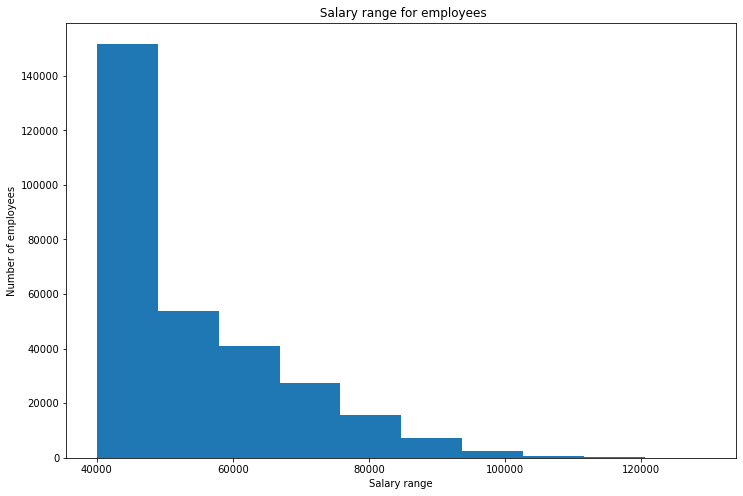

In [10]:
salaries.hist(column='salary', bins=10, grid=False, figsize=(12,8))
plt.xlabel("Salary range")
plt.ylabel("Number of employees")
plt.title(" Salary range for employees")
plt.savefig("Histogram_SalaryRange")

In [13]:
# merge tables
emp_sal_df = pd.merge(employees, salaries, on="emp_no", how="inner")
emp_sal_df.rename(columns={'emp_title_id':'title_id'}, inplace=True)
emp_sal_title_df = pd.merge(emp_sal_df, titles, on="title_id", how="inner")

In [6]:
avg_sal = emp_sal_title_df.groupby("title")["salary"].mean()

#### Bar chart of average salary for different job titles

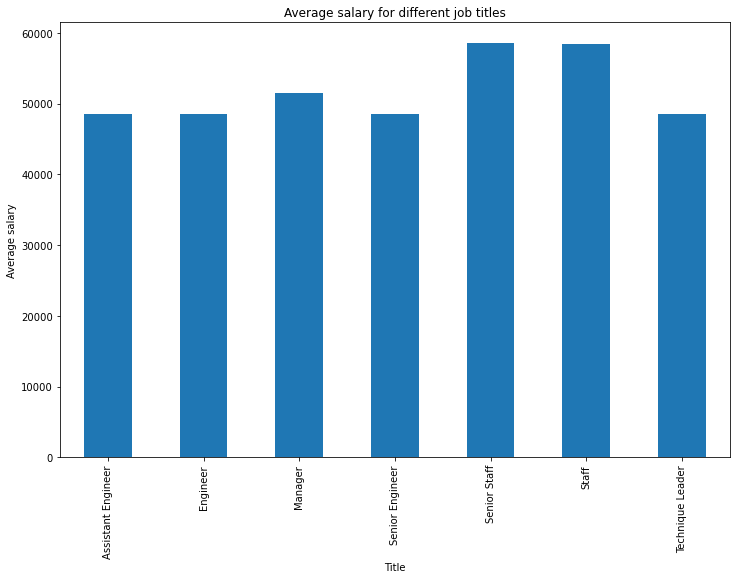

In [12]:
avg_sal.plot.bar(figsize=(12,8))
plt.xlabel("Title")
plt.ylabel("Average salary")
plt.title("Average salary for different job titles")
plt.savefig("BarChart_AverageSalaryPerJobTitle")